##Ejemplo 1 Aplicación de Aprendizaje no Supervisado Aplicando el algoritmo de **K-MEANS**

En este ejemplo se busca agrupar a usuarios de Twitter de acuerdo a su personalidad utilizando K-means.

Ejemplo Tomado del libro: [Aprende Machine Learning en Español](https://leanpub.com/aprendeml/)

## Paso 1. Se importan las librerías y paquetes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Paso 2. Obtener y analizar los datos
En este ejemplo se busca agrupar a usuarios de Twitter de acuerdo a su personalidad utilizando K-means. El análisis se encuentra basado en una metodología de psicología conocida como “Ocean: The Big Five”, tendremos como características de entrada:

* usuario (el nombre en Twitter)
* “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
* “co” =Conscientiousness – grado de orden, prolijidad, organización
* “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
* “ag” = Agreeableness – grado de empatía con los demás, temperamento
* “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
* Wordcount – Cantidad promedio de palabras usadas en sus tweets
* Categoria – Actividad laboral del usuario (actor, cantante, etc.)

Utilizaremos el algoritmo K-means para que agrupe estos usuarios -no por su actividad laboral- si no, por sus similitudes en la personalidad.

El dataset utilizado contiene diferenciadas 9 categorías de actividades laborales que son:

1. Actor/actriz
2. Cantante
3. Modelo
4. Tv, series
5. Radio
6. Tecnología
7. Deportes
8. Politica
9. Escritor

In [3]:
dataframe = pd.read_csv("/content/dataEx1_kmeans.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [4]:
# Registros por Categorías
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


### Paso 3. Visualización de los datos

En este paso se observaran los datos de manera grafica para tener una idea de la dispersión de los mismos:

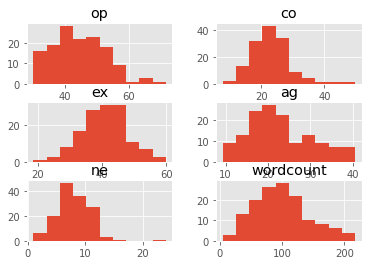

In [6]:
dataframe.drop(['categoria'],1).hist()
plt.show()

###Para el analisis se utilizaran 3 características de las que se incluyen en el dataset. 

En la siguiente grafica se observa la correlación que hay entre las características seleccionadas (Matriz de Confusión)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


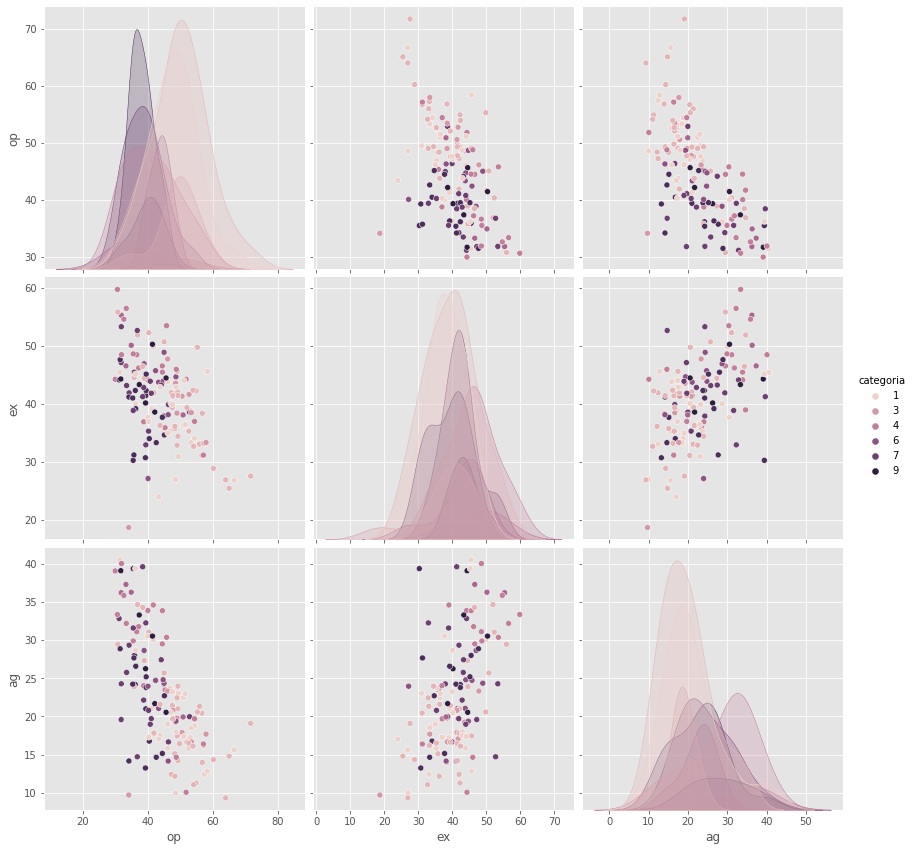

In [7]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

Revisando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre los usuarios y sus categorías.

## Paso 3. Definición del modelo

In [8]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape


(140, 3)

### El resultado de la siguiente grafica es el que queremos modificar utilizando kmeans. 

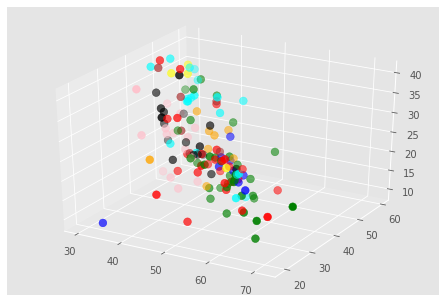

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

### A continuación se define el valor de K haciendo una gráfica e intentando hallar el “punto de codo”. 

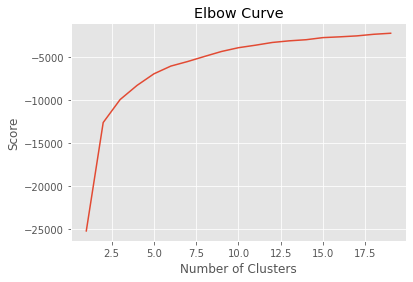

In [10]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Se ejecuta el algoritmo de k-means utilizando 5 clusters, de esta forma se obtienen los centroidos.

In [11]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[42.66891482 33.31008136 21.11530482]
 [39.55874337 44.81190669 24.291027  ]
 [50.15530371 40.81295548 17.39048745]
 [35.39154169 47.17372597 34.50044186]
 [58.70462307 30.53566167 15.72207033]]


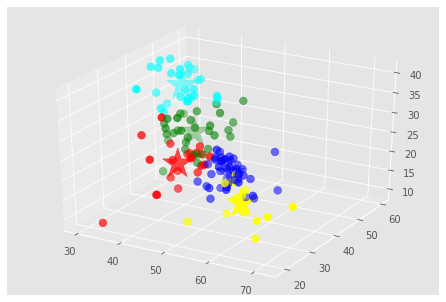

In [12]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

En la grafica anterior se observa que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.


* “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
* “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
* “ag” = Agreeableness – grado de empatía con los demás, temperamento

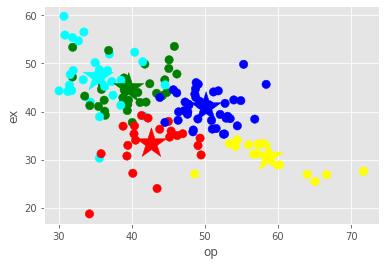

In [13]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.xlabel("op")
plt.ylabel("ex")
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

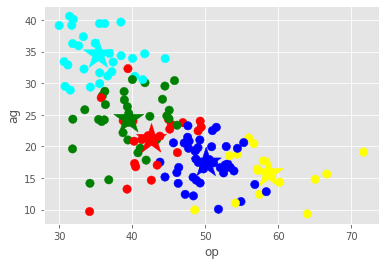

In [14]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.xlabel("op")
plt.ylabel("ag")
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

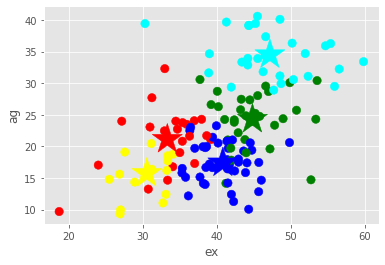

In [15]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.xlabel("ex")
plt.ylabel("ag")
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

### Es posible observar cada uno de los clusters y cuantos usuarios tiene: 

In [16]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,22
1,green,32
2,blue,42
3,cyan,29
4,yellow,15


### Tambien se pueden observar las actividades laborales de los usuarios pertenecientes a cada cluster. 

El dataset utilizado contiene diferenciadas 9 categorías de actividades laborales que son:

1. Actor/actriz
2. Cantante
3. Modelo
4. Tv, series
5. Radio
6. Tecnología
7. Deportes
8. Politica
9. Escritor

In [17]:
# Registros por Categorías
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


In [18]:
group_referrer_index = copy['label'] ==0 #Cluster a evaluar
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,6.0
2,2,3.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,1.0
7,7,3.0
8,8,5.0
9,9,1.0
